### Mathematics: 
numbers, series, functions, linear algebra, transformations, nonlinearities, calculus, sets and groups,  variety of techniques to solve and optimize, .... 
### Physical science: 
Underlying physical laws and principles: from classical to quantum and their usage and consequences with more open questions.
### Engineering: 
Information, techniques of optimization, and mathematical tools applied to design and optimization.
### Machine learning: 
An approximator of powerful strength with potentially vast usage.

* We will fold in all of these, starting with an integrated look at mathematics, applying it into science and engineering as a 
simultaneous way to the coding environment utilizing python, and the large number of libraries that are now around.
* We will use this learning to tackle important problems as an intermediate stage for a variety of problems across the domains of science and engineering, from circuit design to nature to finance, to much else, ...
* We will end with advanced topics of open complex systems, where much may not be known, problems can not clearly be bounded, and even underlying foundations not known, to see if one can actually uncover some of these underlying principles from the information. 


## Linear regression as the simplest example of ml approximator.
Linear regression appears statistically through ridge (ordinary least squares with l2 regularization), lasso (linear model with sparse coefficients wit l1 regularization), elastic net (both l1 and l2 regularization), ...

### AKASH SINGH
Rno. 22101402

In [38]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import sklearn as sklearn

Linear regression is a straight-line fit to data, so a slope and an intercept to
$ y = ax +b$.


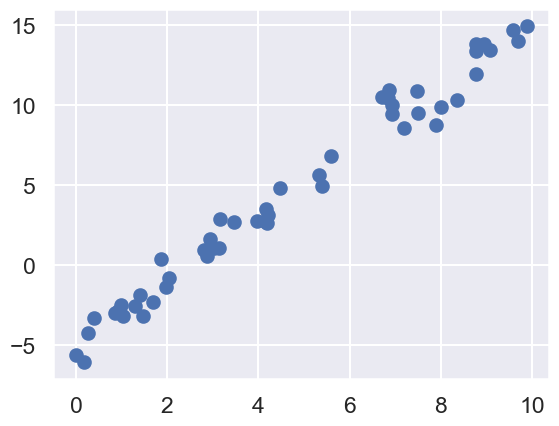

In [43]:
rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = 2 * x - 5 + rng.randn(50)  #added some random Gaussian noise.
plt.scatter(x, y);

Model slope:     2.0272088103606953
Model intercept: -4.998577085553204


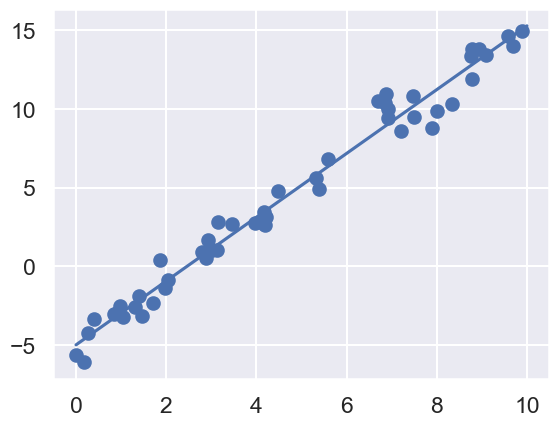

In [44]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)

model.fit(x[:, np.newaxis], y)

xfit = np.linspace(0, 10, 1000)
yfit = model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit)
print("Model slope:    ", model.coef_[0])
print("Model intercept:", model.intercept_)

*  Close to the numbers used in generating the data.
* We can expand it to polynomial regression too. This uses pipelining transformation and converts higher dimensional data to a linear regression.


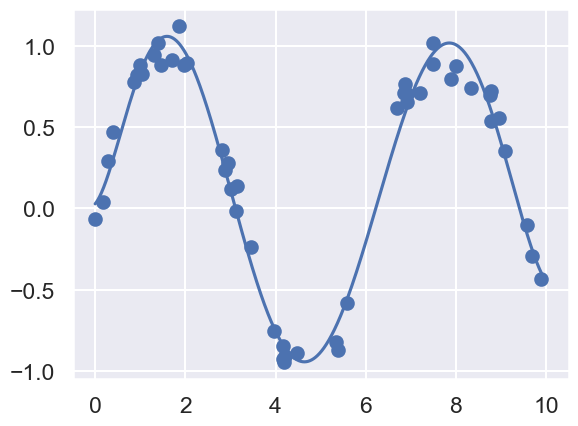

In [45]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
poly_model = make_pipeline(PolynomialFeatures(7),
                           LinearRegression())
rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = np.sin(x) + 0.1 * rng.randn(50)

poly_model.fit(x[:, np.newaxis], y)
yfit = poly_model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit);


just complicate the problem a little bit with data a simple analytic polynomial with multiple solutions.

### Science-based deep learning
Example: Inverting a parabolic equation by brute force and using constraints from science/physics.<br>
Given a function ${\cal{P}}: y \mapsto y^{2}, \; \; y \in [-1,1]$, find the unknown $f$ s.t. ${\cal{P}}(f(x)) =x, \; \; y \in [-1,1]$.



In [46]:
import numpy as np
import tensorflow as tf
from matplotlib import pyplot as plt

In [47]:
# X-Data
N = 200
X = np.random.random(N)
# Generation Y-Data
sign = (- np.ones((N,)))**np.random.randint(2,size=N)
Y = np.sqrt(X) * sign

Network: loss, training in keras/tensforlfow with 3 hidden layers and ReLU activation. 

In [48]:
# Neural network
act = tf.keras.layers.ReLU()
nn_sv = tf.keras.models.Sequential([
  tf.keras.layers.Dense(10, activation=act, input_shape=(1,)),
  tf.keras.layers.Dense(10, activation=act),
  tf.keras.layers.Dense(1,activation='linear')])

Loss function chosen to be mean-square loss (fit function in keras)

In [49]:
# Loss function
loss_sv = tf.keras.losses.MeanSquaredError()
optimizer_sv = tf.keras.optimizers.Adam(learning_rate=0.001)
nn_sv.compile(optimizer=optimizer_sv, loss=loss_sv)

# Training
results_sv = nn_sv.fit(X, Y, epochs=5, batch_size= 5, verbose=1)

Epoch 1/5
40/40 [==============================] - 0s 724us/step - loss: 0.5499
Epoch 2/5
40/40 [==============================] - 0s 660us/step - loss: 0.5471
Epoch 3/5
40/40 [==============================] - 0s 632us/step - loss: 0.5461
Epoch 4/5
40/40 [==============================] - 0s 631us/step - loss: 0.5474
Epoch 5/5
40/40 [==============================] - 0s 631us/step - loss: 0.5471


7/7 [==============================] - 0s 737us/step


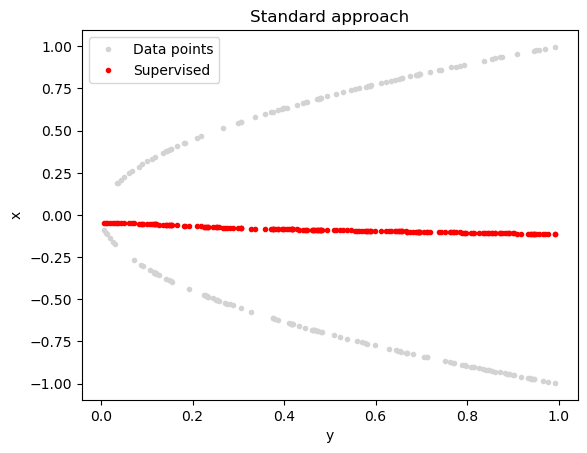

In [11]:
# Results
plt.plot(X,Y,'.',label='Data points', color="lightgray")
plt.plot(X,nn_sv.predict(X),'.',label='Supervised', color="red")
plt.xlabel('y')
plt.ylabel('x')
plt.title('Standard approach')
plt.legend()
plt.show()

Data points are along the two parabola. <br>
The network is attempting to average on both the $+$ side and $-$ side of the $y$s that produced $y^{2}$. <br>
*Incorrect answer from the reduction of mean-squared error on $\pm$ data.* <br>
*Loss functions matter.*<br>
*Also fluctuations around $x=0$.*<br> 

*Differentiable physics network to find $f$ using same $x$ locations.*<br>
network: nn_dp

In [56]:
# X-Data
# X = X ,  re-use the X 
# Y  evaluated on the fly

# Model
nn_dp = tf.keras.models.Sequential([
  tf.keras.layers.Dense(10, activation=act, input_shape=(1,)),
  tf.keras.layers.Dense(10, activation=act),
  tf.keras.layers.Dense(1, activation='linear')])

Loss function incorporates $f$ directly in training. <br> 
loss_dp computes ${|y_{pred}^{2} - y_{true}|}^{2}$ in training. This function pulls in the small and large differences over the two branches to minimize the large. <br> 
More constraint forms can also be added as regularization. <br>

In [57]:
#Loss
mse = tf.keras.losses.MeanSquaredError()
def loss_dp(y_true, y_pred):
    return mse(y_true,y_pred**2)

optimizer_dp = tf.keras.optimizers.Adam(learning_rate=0.001)
nn_dp.compile(optimizer=optimizer_dp, loss=loss_dp)

In [58]:
#Training
results_dp = nn_dp.fit(X, X, epochs=5, batch_size=5, verbose=1)

Epoch 1/5
40/40 [==============================] - 0s 660us/step - loss: 0.1255
Epoch 2/5
40/40 [==============================] - 0s 668us/step - loss: 0.0055
Epoch 3/5
40/40 [==============================] - 0s 599us/step - loss: 0.0027
Epoch 4/5
40/40 [==============================] - 0s 617us/step - loss: 0.0022
Epoch 5/5
40/40 [==============================] - 0s 586us/step - loss: 0.0017


7/7 [==============================] - 0s 660us/step


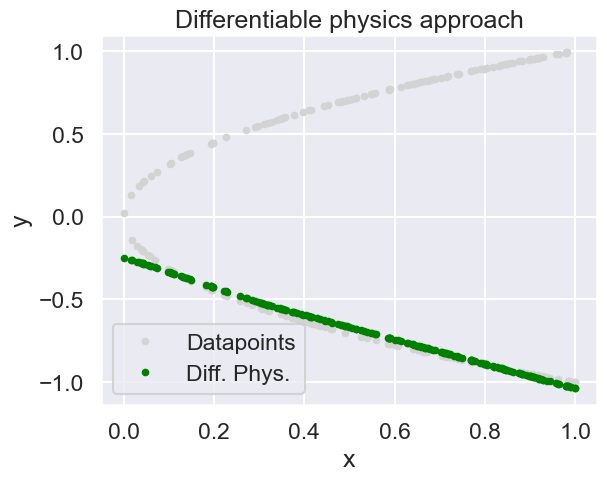

In [59]:
# Results
plt.plot(X,Y,'.',label='Datapoints', color="lightgray")
#plt.plot(X,nn_sv.predict(X),'.',label='Supervised', color="red") # optional for comparison
plt.plot(X,nn_dp.predict(X),'.',label='Diff. Phys.', color="green") 
plt.xlabel('x')
plt.ylabel('y')
plt.title('Differentiable physics approach')
plt.legend()
plt.show()

Some improvement.<br>
The error is visibly large in $[0,0.3]$. The network learned a linear function.<br>
It also latched to one branch of the two modes. <br>
Asking for a deterministic (single valued) function as a solution forced a partial solution. 
The branch picked was because of the random initialization of the weights inf $f$. It could have gone the other way too.<br>

The network is learning only a linear approximation. It is short and narrow. <br>


Epoch 1/5
40/40 [==============================] - 0s 683us/step - loss: 4.7331e-04
Epoch 2/5
40/40 [==============================] - 0s 655us/step - loss: 4.1951e-04
Epoch 3/5
40/40 [==============================] - 0s 612us/step - loss: 4.6902e-04
Epoch 4/5
40/40 [==============================] - 0s 599us/step - loss: 3.2417e-04
Epoch 5/5
7/7 [==============================] - 0s 743us/step


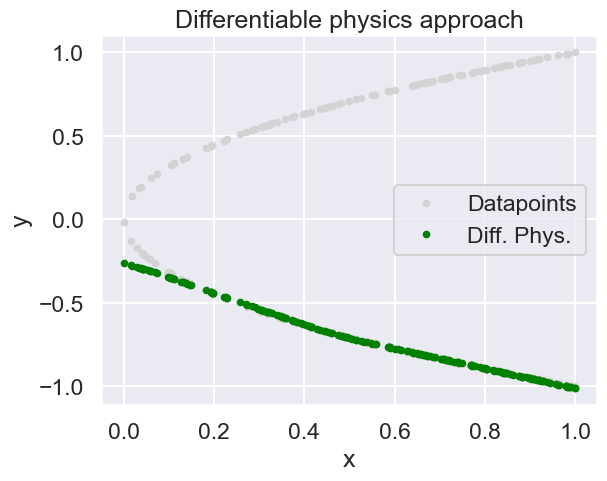

In [61]:
# Generation Y-Data
sign = ( - np.ones((N,)))**np.random.randint(2,size=N)
Y = np.sqrt(X) * sign

#Loss
mse = tf.keras.losses.MeanSquaredError()
def loss_dp(y_true, y_pred):
    return mse(y_true,y_pred**2)

optimizer_dp = tf.keras.optimizers.Adam(learning_rate=0.001)
nn_dp.compile(optimizer=optimizer_dp, loss=loss_dp)

#Training
results_dp =  nn_dp.fit(X, X, epochs=5, batch_size=5, verbose=1)

# Results
plt.plot(X,Y,'.',label='Datapoints', color="lightgray")
#plt.plot(X,nn_sv.predict(X),'.',label='Supervised', color="red") # optional for comparison
plt.plot(X,nn_dp.predict(X),'.',label='Diff. Phys.', color="green") 
plt.xlabel('x')
plt.ylabel('y')
plt.title('Differentiable physics approach')
plt.legend()
plt.show()

This is an example of dealing with bifurcations, which are ubiquitous in nonlinear systems.<br>
We can get one side or the other side of the curve since a deterministic function is being forced as a condition on the solution. We found one or the other mode, but not both simultaneously. Which mode depended on the starting point. 
* Nonlinearity induced this bifurcation. <br>
* But we avoided the averaging of modes that gives the wrong answer.<br>

Smoke rises, having left a flame top, straight, but then, the motion will oscillate in modes (hopf bifurcation), and move long different paths under stimulus of air flows. Whether we are males of females is determined at conception. This is order appearing from nonlinearity.<br>
Navier-Stokes equations has to deal with these bifurcations and that is why it is an interesting equation and turbulence still not understood in its entirety.<br>
In numerical perturbation, averaging modes with mean-square error will lead to an average straight flow like this parabola.<br>
We do not want the averaging numerically. <br>
Training by differentiable physics---a constraint added on all the others---tackles these problems when done right.<br>
Even if near the lwo values, with the large values dominating the loss, we are quite off. 


##  stochasticity
* Linear response systems (EEs learn this, so do physicists, and it is used by materials and chemical and other disciplines too) is a zero'th order consequence of stochasticity with hard causality.

In [62]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [63]:
# Some care is needed when removing warnings. But for the final version of this notebook it should be safe.
import warnings
warnings.simplefilter("ignore", UserWarning)
warnings.simplefilter("ignore", FutureWarning)

In [64]:
# Not really needed, but nicer plots
import seaborn as sns
sns.set()
sns.set_context("talk")

## Statistics and probabilities
### Frequentist or Bayesian?

| Statistics	    | Definition |
|---------------|-------------|
| Frequentist   | ${\mathfrak{p}}(A)$ = relative frequency of event $A$ in an identical repitition of an experiment. <br/><br/>${\mathfrak{p}}(A)$ is the expected likelihood of the occurrence of $A$. |
| Bayesian   | ${\mathfrak{p}}(A \vert B)$ = is a belief of the possibility of the hypothesis $A$ given knowledge of $B$. A belief of the possibility of <br/><br/>${\mathfrak{p}}(A) 
$ changes as one knows more. |

A Bayesian interprets probability as a representation of the degrees of uncertainty.  Prior information matters.


Bayes' theorem: 

$$ {\mathfrak{p}}(p~|~D,I) = \frac{{\mathfrak{p}}(D~|~p,I)~{\mathfrak{p}}(p~|~I)}{{\mathfrak{p}}(D~|~I)} $$

- ${\mathfrak{p}}(p~|~D,I)$: Posterior probability for model parameters given data $D$ and information $I$. This is what we want.
- ${\mathfrak{p}}(D~|~p,I)$: Likelihood function (**likelihood**).  Frequentist methods often seek to maximize it
- ${\mathfrak{p}}(p~|~I)$: A priori (**prior**). Describes what we know about the model before acquiring data collection $D$.
- ${\mathfrak{p}}(D~|~I)$: Data's probability (**Data probability**). In practice this corresponds to a normalization constant.

This formulation is *fundamentally different* from frequentist philosophy. To the frequentists, the concept of probability has no meaning for model parameters. Theirs is a probability (or frequency) of observing certain data given a fixed model.

The two approaches to statistical inference are quite often equivalent, at least for simple problems. <br>
But the Bayesian, with the explicit statements about <b>prior information</b>, and its clear connection to <b>available data</b> is more natural to science.

Two situations where the differences are particularly clear apply:
1. The management of "nuisance hidden parameters" (<b>nuisance parameters</b>), things we don't know or even don't have an inkling that they matter.
2. The important difference between these subtle ideas are very very important: frequentist <b>confidence interval</b> and Bayesian <b>credibility interval/range</br>

Hidden parameters are constant surprises. There is still a debate in quantum about them, not yet buried.

Magic and god are also often invoked.


## An example: Bayesian billiards
[Frequentism and Bayesianism II: When results differ and it shows](http://jakevdp.github.io/blog/2014/06/06/frequentism-and-bayesianism-2-when-results-differ/) 

This example of nuisance parameters dates all the way back to the posthumous [1763 paper](http://www.stat.ucla.edu/history/essay.pdf) written by Thomas Bayes himself. The particular version of this problem used here is borrowed from [Eddy 2004](ftp://selab.janelia.org/pub/publications/Eddy-ATG3/Eddy-ATG3-reprint.pdf).

### The ABC Game (My Glass Bead Game)
The setting is a rather contrived game in which Anarkali and Balaji bet on the outcome of a process they can't directly observe.

Anarkali and Balaji enter a room. Behind a curtain there is a billiard table, which they cannot see, but their friend Curioius George can. Curious George rolls a ball down the table, and marks where it lands. Once this mark is in place, Curious George begins rolling new balls down the table. If the ball lands to the left of the mark, Anarkali gets a point; if it lands to the right of the mark, Balaji gets a point.  We can assume for the sake of example that Curious George's rolls are unbiased (he is a monkey, but not the Two cats and a Monkey Panchatantra tale kind):
* The balls have an equal chance of ending up anywhere on the table.
* **The first person to reach **six points** wins the game.**

The location of the mark (determined by the first roll) can be considered a nuisance parameter: it is unknown, and not of immediate interest, but it clearly must be accounted for when predicting the outcome of subsequent rolls. <br> 
If the first roll settles far to the right, then subsequent rolls will favor Anarkali.<br< 
If it settles far to the left, Balaji will be favored instead.

Given this setup, the question we ask:

**In a particular game, after 8 rolls, Anarkali has 5 points and Balaji has 3 points. What is the probability that Balaji will go on to win the game?**

Intuitively, you probably realize that because Anarkali received 5 of the 8 points, the marker placement likely favors her. And given this, it's more likely that the next roll will go her way as well. And she has 3 opportunities to get a favorable roll before Balaji can win; she seems to have clinched it.<br>  
But **quantitatively**, what is the probability that Balaji will squeak-out a win?

### A naive frequentist approach
Someone following a classical frequentist approach may reason as follows:

To determine the result, we need an intermediate estimate of where the marker sits. We'll quantify this marker placement as a probability ${\mathfrak{p}}$ that any given roll lands in Anarkali's favor.  Because 5 balls out of 8 fell on Anarkali's side of the marker, we can quickly show that the maximum likelihood estimate of ${\mathfrak{p}}$ is given by:

$$
\hat{{\mathfrak{p}}} = 5/8
$$

(This result follows in a straightforward manner from the [binomial likelihood](http://en.wikipedia.org/wiki/Binomial_distribution)). Assuming this maximum likelihood probability, we can compute the probability that Balaji will win, which is given by:

$$
{\mathfrak{p}}(B) = (1 - \hat{{\mathfrak{p}}})^3
$$

That is, he needs to win 3 rolls in a row. Thus, we find that the following estimate of the probability:

In [20]:
p_hat = 5. / 8.
freq_prob = (1 - p_hat) ** 3
print("Naive frequentist probability of Balaji winning: %.2f" %freq_prob)

Naive frequentist probability of Balaji winning: 0.05


In other words, we'd give Balaji the following odds of winning:

In [21]:
print("Odds against Balaji winning: %i to 1" %((1. - freq_prob) / freq_prob))

Odds against Balaji winning: 17 to 1


So we've estimated using frequentist ideas that Anarkali will win about 17 times for each time Balaji wins. <br> 
Let's try a Bayesian approach next.

### Bayesian approach

This is slightly more involved, and requires us to first define some notation.

We'll consider the following random variables:

- $B$ = Balaji wins
- $D$ = observed data, i.e. $D = (n_A, n_B) = (5, 3)$
- $p$ = unknown probability that a ball lands on Anarkali's side during the current game

We want to compute ${\mathfrak{p}}(B~|~D)$; that is, the probability that Balaji wins given our observation that Anarkali currently has 5 points to Balaji's 3.

The general Bayesian method of treating nuisance parameters is *marginalization*, or integrating the joint probability over the entire range of the nuisance parameter. In this case, that means that we will first calculate the joint distribution

$$
{\mathfrak{p}}(B,p~|~D)
$$

and then marginalize over $p$ using the following identity:

$$
{\mathfrak{p}}(B~|~D) \equiv \int_{-\infty}^\infty {\mathfrak{p}}(B,p~|~D) {\mathrm d} p
$$

This identity follows from the definition of conditional probability, and the law of total probability: that is, it is a fundamental consequence of probability axioms and will always be true. Even a frequentist would recognize this; they would simply disagree with the interpretation of ${\mathfrak{p}}(p)$ as being a measure of uncertainty of our own knowledge.

#### Building our Bayesian Expression

To compute this result, we will manipulate the above expression for ${\mathfrak{p}}(B~|~D)$ until we can express it in terms of other quantities that we can compute.

We'll start by applying the following definition of [conditional probability](http://en.wikipedia.org/wiki/Conditional_probability#Definition) to expand the term ${\mathfrak{p}}(B,p~|~D)$:

$$
{\mathfrak{p}}(B~|~D) = \int {\mathfrak{p}}(B~|~p, D) {\mathfrak{p}} (p~|~D) dp
$$

Next we use [Bayes' rule](http://en.wikipedia.org/wiki/Bayes%27_theorem) to rewrite $ {\mathfrak{p}}(p~|~D)$:

$$
{\mathfrak{p}}(B~|~D) = \int {\mathfrak{p}}(B~|~p, D) \frac{{\mathfrak{p}}(D~|~p){\mathfrak{p}}(p)}{{\mathfrak{p}}(D)} dp
$$

Finally, using the same probability identity we started with, we can expand ${\mathfrak{p}}(D)$ in the denominator to find:

$$
{\mathfrak{p}}(B~|~D) = \frac{\int {\mathfrak{p}}(B~|~p,D) {\mathfrak{p}}(D~|~p) {\mathfrak{p}}(p) dp}{\int {\mathfrak{p}}(D~|~p){\mathfrak{p}}(p) dp}
$$

Now the desired probability is expressed in terms of three quantities that we can compute. Let's look at each of these in turn:

- ${\mathfrak{p}}(B~|~p,D)$: This term is exactly the frequentist likelihood we used above. In words: given a marker placement $p$ and the fact that Anarkali has won 5 times and Balaji 3 times, what is the probability that Balaji will go on to 6 wins?  Balaji needs 3 wins in a row, i.e. ${\mathfrak{p}}(B~|~p,D) = (1 - p) ^ 3$.
- ${\mathfrak{p}}(D~|~p)$: this is another easy-to-compute term. In words: given a probability $p$, what is the likelihood of exactly 5 positive outcomes out of 8 trials? The answer comes from the well-known [Binomial distribution](http://en.wikipedia.org/wiki/Binomial_distribution): in this case ${\mathfrak{p}}(D~|~p) \propto p^5 (1-p)^3$
- ${\mathfrak{p}}(p)$: this is our prior on the probability $p$. By the problem definition, we can assume that $p$ is evenly drawn between 0 and 1.  That is, ${\mathfrak{p}}(p)$ is a uniform probability distribution in the range from 0 to 1.

Putting this all together, canceling some terms, and simplifying a bit, we find
$$
{\mathfrak{p}}(B~|~D) = \frac{\int_0^1 (1 - p)^6 p^5 dp}{\int_0^1 (1 - p)^3 p^5 dp}
$$
where both integrals are evaluated from 0 to 1.

These integrals might look a bit difficult, until we notice that they are special cases of the [Beta Function](http://en.wikipedia.org/wiki/Beta_function):
$$
\beta(n, m) = \int_0^1 (1 - p)^{n - 1} p^{m - 1} dp
$$
The Beta function can be further expressed in terms of gamma functions (i.e. factorials), but for simplicity we'll compute them directly using Scipy's beta function implementation:

In [22]:
from scipy.special import beta
bayes_prob = beta(6 + 1, 5 + 1) / beta(3 + 1, 5 + 1)

print("probability(B|D)$ = %.2f" %bayes_prob)

probability(B|D)$ = 0.09


The associated odds are:

In [24]:
print("Bayesian odds against Balaji winning: %i to 1" %((1. - bayes_prob) / bayes_prob))

Bayesian odds against Balaji winning: 10 to 1


So we see that **the Bayesian result gives us 10 to 1 odds, which is quite different than the 17 to 1 odds found using the frequentist approach.** 

### Which is right?

### Brute-force (Monte Carlo) approach

For this type of well-defined and simple setup, it is actually relatively easy to use a Monte Carlo simulation to determine the correct answer. This is essentially a brute-force tabulation of possible outcomes: we generate a large number of random games, and simply count the fraction of relevant games that Balajigoes on to win. The current problem is especially simple because so many of the random variables involved are uniformly distributed.  We can use the ``numpy`` package to do this as follows:

In [25]:
np.random.seed(0)

# play 100000 games with randomly-drawn p, between 0 and 1
p = np.random.random(100000)

# each game needs at most 11 rolls for one player to reach 6 wins
rolls = np.random.random((11, len(p)))

# count the cumulative wins for Anarkali and Balaji at each roll
Anarkali_count = np.cumsum(rolls < p, 0)
Balaji_count = np.cumsum(rolls >= p, 0)

# sanity check: total number of wins should equal number of rolls
total_wins = Anarkali_count + Balaji_count
assert np.all(total_wins.T == np.arange(1, 12))
print("(Sanity check passed)")

(Sanity check passed)


In [26]:
# determine number of games which meet criterion of (A wins, B wins)=(5, 3)
# this means Balaji's win count at eight rolls must equal 3
good_games = Balaji_count[7] == 3
print("Number of suitable games: {0}".format(good_games.sum()))

# truncate results to consider only these games
Anarkali_count = Anarkali_count[:, good_games]
Balaji_count = Balaji_count[:, good_games]

# determine which of these games Balaji won.
# to win, he must reach 6 wins after 11 rolls.
balaji_won = np.sum(Balaji_count[10] == 6)
print("Number of these games Balaji won: {0}".format(balaji_won.sum()))

# compute the probability
mc_prob = balaji_won.sum() * 1. / good_games.sum()
print("Monte Carlo probability of Balaji winning: {0:.2f}".format(mc_prob))
print("MC Odds against Balaji winning: {0:.0f} to 1".format((1. - mc_prob) / mc_prob))

Number of suitable games: 11068
Number of these games Balaji won: 979
Monte Carlo probability of Balaji winning: 0.09
MC Odds against Balaji winning: 10 to 1


The Monte Carlo approach gives 10-to-1 odds on Balaji, which agrees with the Bayesian approach. Apparently, our naive frequentist approach above was flawed.

### Discussion

This example shows several different approaches to dealing with the presence of a nuisance parameter *p*. The Monte Carlo simulation gives us a close brute-force estimate of the true probability (assuming the validity of our assumptions), which the Bayesian approach matches. The naïve frequentist approach, by utilizing a single maximum likelihood estimate of the nuisance parameter $p$, arrives at the wrong result.

We should emphasize that **this does not imply frequentism itself is incorrect**. The incorrect result above is more a matter of the approach being "naive" than it being "frequentist". There certainly exist frequentist methods for handling this sort of nuisance parameter – for example, it is theoretically possible to apply a transformation and conditioning of the data to isolate the dependence on $p$ – but it's hard to find any approach to this particular problem that does not somehow take advantage of Bayesian-like marginalization over $p$.

## Second example: Linear curve fitting with outliers (outliers)
From [Frequentism and Bayesianism II: When Results Differ](http://jakevdp.github.io/blog/2014/06/06/frequentism-and-bayesianism-2-when-results-differ/) 

One situation where the concept of nuisance parameters can be helpful is accounting for outliers in data. Consider the following dataset, relating the observed variables $x$ and $y$, and the error of $y$ stored in $e$.

In [27]:
x = np.array([ 0,  3,  9, 14, 15, 19, 20, 21, 30, 35,
              40, 41, 42, 43, 54, 56, 67, 69, 72, 88])
y = np.array([33, 68, 34, 34, 37, 71, 37, 44, 48, 49,
              53, 49, 50, 48, 56, 60, 61, 63, 44, 71])
e = np.array([ 3.6, 3.9, 2.6, 3.4, 3.8, 3.8, 2.2, 2.1, 2.3, 3.8,
               2.2, 2.8, 3.9, 3.1, 3.4, 2.6, 3.4, 3.7, 2.0, 3.5])

Visualize this data:

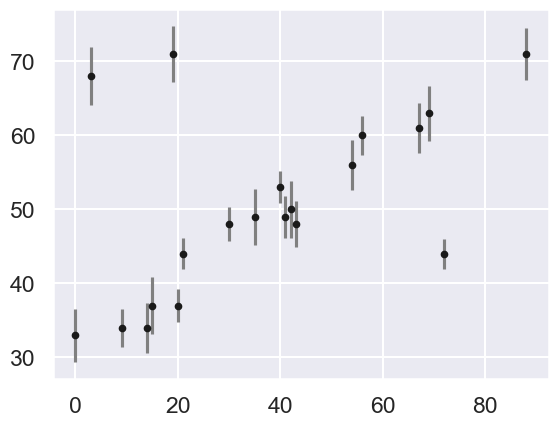

In [28]:
plt.errorbar(x, y, e, fmt='.k', ecolor='gray');

The task is to find a line of best-fit to the data. It's clear upon visual inspection that there are some outliers among these points, but let's start with a simple non-robust maximum likelihood approach. 

Like we saw, the following simple maximum likelihood result can be considered to be either frequentist or Bayesian (with uniform priors): in this sort of simple problem, the approaches are essentially equivalent.

We'll propose a simple linear model, which has a slope and an intercept encoded in a parameter vector $\theta$. The model is defined as follows:
$$
\hat{y}(x~|~\theta) = \theta_0 + \theta_1 x
$$
Given this model, we can compute a Gaussian likelihood for each point:
$$
p(x_i,y_i,e_i~|~\theta) \propto \exp\left[-\frac{1}{2e_i^2}\left(y_i - \hat{y}(x_i~|~\theta)\right)^2\right]
$$
The total likelihood is the product of all the individual likelihoods. Computing this and taking the log, we have:
$$
\log \mathcal{L}(D~|~\theta) = \mathrm{const} - \sum_i \frac{1}{2e_i^2}\left(y_i - \hat{y}(x_i~|~\theta)\right)^2
$$
This final expression is the log-likelihood of the data given the model, which can be maximized to find the $\theta$ corresponding to the maximum-likelihood model. Equivalently, we can minimize the summation term, which is known as the *loss*:
$$
\mathrm{loss}= \ell = \sum_i \frac{1}{2e_i^2}\left(y_i - \hat{y}(x_i~|~\theta)\right)^2
$$
This loss expression is known as a *squared loss*; here we've simply shown that the squared loss can be derived from the Gaussian log likelihood.

### Standard likelihood approach

We can maximize the likelihood (or, equivalently, minimize the loss) to find $\theta$ within a frequentist paradigm. For a flat prior in $\theta$, the maximum of the Bayesian posterior will yield the same result. (note that there are good arguments based on the principle of maximum entropy that a flat prior is not the best choice here; we'll ignore that detail for now, as it's a very small effect for this problem).

For simplicity, we'll use scipy's ``optimize`` package to minimize the loss (in the case of squared loss, this computation can be done more efficiently using matrix methods, but we'll use numerical minimization for simplicity here)

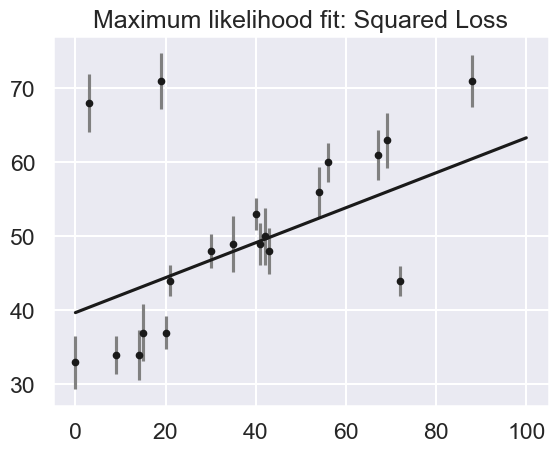

In [29]:
from scipy import optimize

def squared_loss(theta, x=x, y=y, e=e):
    dy = y - theta[0] - theta[1] * x
    return np.sum(0.5 * (dy / e) ** 2)

theta1 = optimize.fmin(squared_loss, [0, 0], disp=False)

xfit = np.linspace(0, 100)
plt.errorbar(x, y, e, fmt='.k', ecolor='gray')
plt.plot(xfit, theta1[0] + theta1[1] * xfit, '-k')
plt.title('Maximum likelihood fit: Squared Loss');

It's clear on examination that the outliers are exerting a disproportionate influence on the fit. This is due to the nature of the squared loss function. If you have a single outlier that is, say 10 standard deviations away from the fit, its contribution to the loss will out-weigh that of 25 points which are 2 standard deviations away!

Clearly the squared loss is overly sensitive to outliers, and this is causing issues with our fit. One way to address this within the frequentist paradigm is to simply adjust the loss function to be more robust.

### Frequentist Correction for Outliers: Huber Loss

The variety of possible loss functions is quite literally infinite, but one relatively well-motivated option is the [Huber loss](http://en.wikipedia.org/wiki/Huber_loss_function). 

The Huber loss defines a critical value at which the loss curve transitions from quadratic to linear. Let's create a plot which compares the Huber loss to the standard squared loss for several critical values $c$:

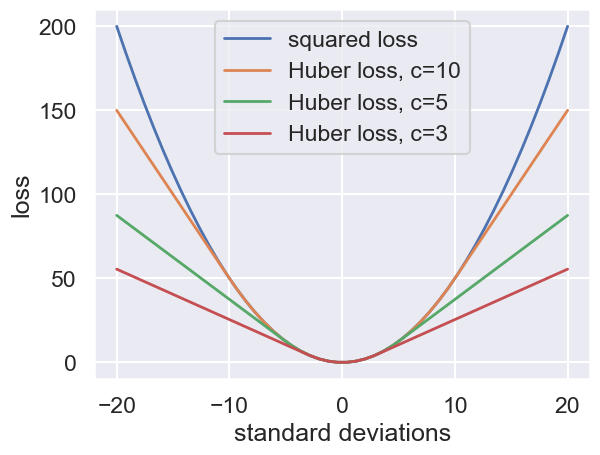

In [30]:
t = np.linspace(-20, 20)

def huber_loss(t, c=3):
    return ((abs(t) < c) * 0.5 * t ** 2
            + (abs(t) >= c) * -c * (0.5 * c - abs(t)))

plt.plot(t, 0.5 * t ** 2, label="squared loss", lw=2)
for c in (10, 5, 3):
    plt.plot(t, huber_loss(t, c), label="Huber loss, c={0}".format(c), lw=2)
plt.ylabel('loss')
plt.xlabel('standard deviations')
plt.legend(loc='best');

The Huber loss is equivalent to the squared loss for points which are well-fit by the model, but reduces the loss contribution of outliers. For example, a point 20 standard deviations from the fit has a squared loss of 200, but a c=3 Huber loss of just over 55. Let's see the result of the best-fit line using the Huber loss rather than the squared loss. We'll plot the squared loss result in light gray for comparison:

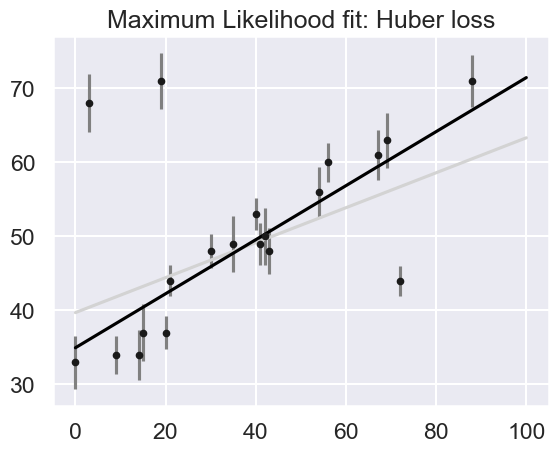

In [31]:
def total_huber_loss(theta, x=x, y=y, e=e, c=3):
    return huber_loss((y - theta[0] - theta[1] * x) / e, c).sum()

theta2 = optimize.fmin(total_huber_loss, [0, 0], disp=False)

plt.errorbar(x, y, e, fmt='.k', ecolor='gray')
plt.plot(xfit, theta1[0] + theta1[1] * xfit, color='lightgray')
plt.plot(xfit, theta2[0] + theta2[1] * xfit, color='black')
plt.title('Maximum Likelihood fit: Huber loss');

By eye, this seems to have worked as desired: the fit is much closer to our intuition!

However a Bayesian might point out that the motivation for this new loss function is a bit suspect: as we showed, the squared-loss can be straightforwardly derived from a Gaussian likelihood. The Huber loss seems a bit *ad hoc*: Who ordered that? Who and how should the decision for what value of $c$ comes about? Is there any good motivation for using a linear loss on outliers, or should we simply remove them instead? How might this choice affect our resulting model?

### A Bayesian Approach to Outliers: Nuisance Parameters

The Bayesian approach to accounting for outliers generally involves *modifying the model* so that the outliers are accounted for. For this data, it is abundantly clear that a simple straight line is not a good fit to our data. So let's propose a more complicated model that has the flexibility to account for outliers. One option is to **choose a mixture between a signal and a background:**

$$
\begin{array}{ll}
p(\{x_i\}, \{y_i\},\{e_i\}~|~\theta,\{g_i\},\sigma,\sigma_b) = & \frac{g_i}{\sqrt{2\pi e_i^2}}\exp\left[\frac{-\left(\hat{y}(x_i~|~\theta) - y_i\right)^2}{2e_i^2}\right] \\
&+ \frac{1 - g_i}{\sqrt{2\pi \sigma_B^2}}\exp\left[\frac{-\left(\hat{y}(x_i~|~\theta) - y_i\right)^2}{2\sigma_B^2}\right]
\end{array}
$$

What we've done is expanded our model with some nuisance parameters: $\{g_i\}$ is a series of weights which range from 0 to 1 and encode for each point $i$ the degree to which it fits the model. 

$g_i=0$ indicates an outlier, in which case a Gaussian of width $\sigma_B$ is used in the computation of the likelihood. This $\sigma_B$ can also be a nuisance parameter, or its value can be set at a sufficiently high number, say 50.

Our model is much more complicated now: it has 22 parameters rather than 2, but the majority of these can be considered nuisance parameters, which can be marginalized-out in the end, just as we marginalized (integrated) over $p$ in the Billiard example.  Let's construct a function which implements this likelihood. We use the [emcee](http://dan.iel.fm/emcee/current/) package to explore the parameter space. 

To actually compute this, start by defining functions describing our prior, our likelihood function, and our posterior:

In [32]:
# theta will be an array of length 2 + N, where N is the number of points
# theta[0] is the intercept, theta[1] is the slope,
# and theta[2 + i] is the weight g_i

def log_prior(theta):
    #g_i needs to be between 0 and 1
    if (all(theta[2:] > 0) and all(theta[2:] < 1)):
        return 0
    else:
        return -np.inf  # recall log(0) = -inf

def log_likelihood(theta, x, y, e, sigma_B):
    dy = y - theta[0] - theta[1] * x
    g = np.clip(theta[2:], 0, 1)  # g<0 or g>1 leads to NaNs in logarithm
    logL1 = np.log(g) - 0.5 * np.log(2 * np.pi * e ** 2) - 0.5 * (dy / e) ** 2
    logL2 = np.log(1 - g) - 0.5 * np.log(2 * np.pi * sigma_B ** 2) - 0.5 * (dy / sigma_B) ** 2
    return np.sum(np.logaddexp(logL1, logL2))

def log_posterior(theta, x, y, e, sigma_B):
    return log_prior(theta) + log_likelihood(theta, x, y, e, sigma_B)

Now we'll run the MCMC (Markov chain Monte Carlo) samples to explore the parameter space:

In [33]:
# This step takes a bit of time, is using 25000 steps.

ndim = 2 + len(x)  # number of parameters in the model
nwalkers = 50  # number of MCMC walkers
nburn = 10000  # "burn-in" period to let chains stabilize
nsteps = 15000  # number of MCMC steps to take

# set theta near the maximum likelihood, with 
np.random.seed(0)
starting_guesses = np.zeros((nwalkers, ndim))
starting_guesses[:, :2] = np.random.normal(theta1, 1, (nwalkers, 2))
starting_guesses[:, 2:] = np.random.normal(0.5, 0.1, (nwalkers, ndim - 2))

import emcee as emcee # emcee is a Markov chain Monte Carlo package from MIT
sampler = emcee.EnsembleSampler(nwalkers, ndim, log_posterior, args=[x, y, e, 50])
sampler.run_mcmc(starting_guesses, nsteps)

sample = sampler.chain  # shape = (nwalkers, nsteps, ndim)
sample = sampler.chain[:, nburn:, :].reshape(-1, ndim)

/var/folders/b6/vc5l1jj15qx34zc634wwgn280000gn/T/ipykernel_59951/2307609539.py:16: RuntimeWarning: divide by zero encountered in log
  logL2 = np.log(1 - g) - 0.5 * np.log(2 * np.pi * sigma_B ** 2) - 0.5 * (dy / sigma_B) ** 2
/var/folders/b6/vc5l1jj15qx34zc634wwgn280000gn/T/ipykernel_59951/2307609539.py:15: RuntimeWarning: divide by zero encountered in log
  logL1 = np.log(g) - 0.5 * np.log(2 * np.pi * e ** 2) - 0.5 * (dy / e) ** 2


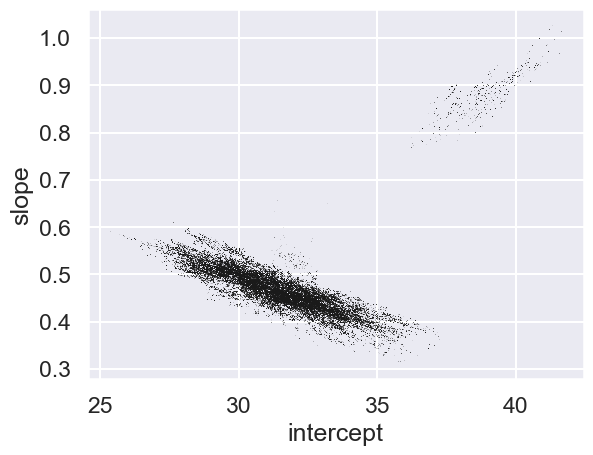

In [34]:
plt.plot(sample[:, 0], sample[:, 1], ',k', alpha=0.1)
plt.xlabel('intercept')
plt.ylabel('slope');

We see a distribution of points near a slope of $\sim 0.4-0.5$, and an intercept of $\sim 29-34$. We'll plot this model over the data below, but first let's see what other information we can extract from this trace.

One nice feature of analyzing MCMC samples is that the choice of nuisance parameters is completely symmetric: just as we can treat the $\{g_i\}$ as nuisance parameters, we can also treat the slope and intercept as nuisance parameters! Let's do this, and check the posterior for $g_1$ and $g_2$, the outlier flag for the first two points:

g1 mean: 0.61
g2 mean: 0.37


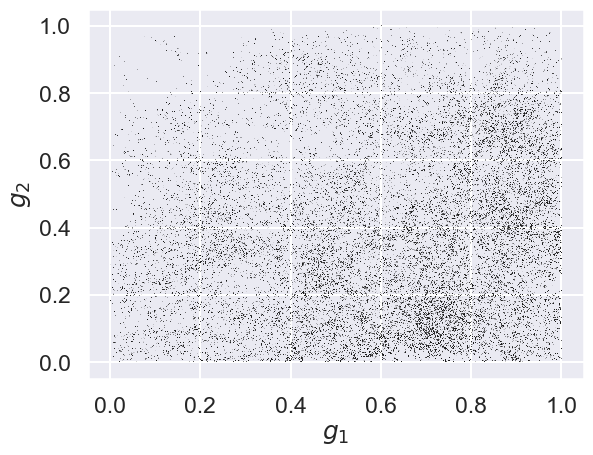

In [35]:
plt.plot(sample[:, 2], sample[:, 3], ',k', alpha=0.1)
plt.xlabel('$g_1$')
plt.ylabel('$g_2$')

print("g1 mean: {0:.2f}".format(sample[:, 2].mean()))
print("g2 mean: {0:.2f}".format(sample[:, 3].mean()))

There is not an extremely strong constraint on either of these, but we do see that $(g_1, g_2) = (1, 0)$ is slightly favored: the means of $g_1$ and $g_2$ are greater than and less than 0.5, respecively. If we choose a cutoff at $g=0.5$, our algorithm has identified $g_2$ as an outlier.

Let's make use of all this information, and plot the marginalized best model over the original data. As a bonus, we'll draw red circles to indicate which points the model detects as outliers:

In [36]:
theta3 = np.mean(sample[:, :2], 0)
g = np.mean(sample[:, 2:], 0)
outliers = (g < 0.5)

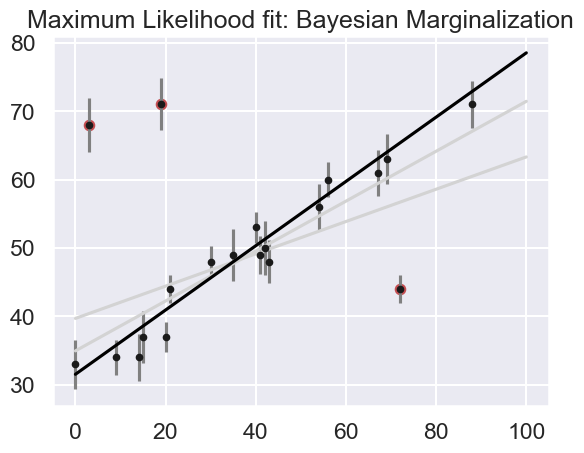

In [37]:
plt.errorbar(x, y, e, fmt='.k', ecolor='gray')
plt.plot(xfit, theta1[0] + theta1[1] * xfit, color='lightgray')
plt.plot(xfit, theta2[0] + theta2[1] * xfit, color='lightgray')
plt.plot(xfit, theta3[0] + theta3[1] * xfit, color='black')
plt.scatter(x[outliers], y[outliers],marker='o',s=40,edgecolors='r',linewidths=2,c='k')
plt.title('Maximum Likelihood fit: Bayesian Marginalization');

The result, shown by the dark line, matches our intuition! Furthermore, the points automatically identified as outliers are the ones we would identify by hand.  For comparison, the gray lines show the two previous approaches: the simple maximum likelihood and the frequentist approach based on Huber loss.